# 제 3차 조별 데이터 분석 실습

* Mission
    * 지금까지 배운 기술을 활용하여 데이터 분석을 해본다.
    * 데이터 원본 분석을 한다.
    * 결측치, 이상치를 점검해 본다.
    * 전처리
    * 탐색적 연구 (Step1, Step2를 반복하여 데이터 분석의 깊이를 더한다.)
         * Step1] 데이터 분석을 위한 목적, 대상 또는 가설을 세워본다. 
         * Step2] 데이터 재 구조화, 시각화를 통해 새로운 insight 및 정보를 습득 및 가설을 검증한다.
    * 최종 결론을 내린다.

## 아래에 데이터를 import 하세요.

In [58]:
# 데이터 import 코드 구현
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib import font_manager,rc

import random

font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# chipo = pd.read_csv('data/book_data.csv',encoding='utf-8')

In [59]:
book=pd.read_csv('data/book_data.csv',encoding='cp949')

In [60]:
book.head()

,book_name,book_writer,book_date,book_price,book_cover,book_page,book_size,book_weight,book_category,book_publisher,sales_point
0,올 더 빌딩스 인 런던,제임스 걸리버 핸콕,2018-08-25,"14,400",양장본,140,225*280mm,476,예술/대중문화,책발전소,110
1,렛 잇 블리드,이언 랜킨,2018-08-19,"13,320",반양장본,476,128*188mm,476,소설/시/희곡,오픈하우스,110
2,은유로 사회 읽기,대니얼 리그니,2018-08-20,"39,500",양장본,416,152*223mm,749,사회과학,한울(한울아카데미),10
3,유럽 맥주 여행,백경학,2018-08-24,"14,400",반양장본,308,150*220mm,400,역사,글항아리,10
4,"이게, 행복이 아니면 무엇이지",김혜령,2018-08-20,"13,050",NaN,288,135*200mm,374,인문학,웨일북,10


---

## 데이터 원본 분석

### 아래 내용을 확인하세요
* 데이터 사이즈
* 데이터 타입
* 각 열의 의미 (열의 이름 및 데이터를 보고 팀원과 상의하여 분석)
* 기타 확인하고 싶은 사항

In [61]:
book.size #2200개의 데이터

22000

In [62]:
book.dtypes #컬럼별 타입

book_name         object
book_writer       object
book_date         object
book_price        object
book_cover        object
book_page         object
book_size         object
book_weight        int64
book_category     object
book_publisher    object
sales_point       object
dtype: object

In [63]:
book.columns

Index(['book_name', 'book_writer', 'book_date', 'book_price', 'book_cover',
       'book_page', 'book_size', 'book_weight', 'book_category',
       'book_publisher', 'sales_point'],
      dtype='object')

---

### 원본 데이터 분석 후 학습한 사항

### 여기에 기술하세요

## 결측치, 이상치 점검
* 누락된 값이 있는지 확인
* 누락된 값을 다른 방식으로 표현하고 있는지도 확인. 예) -, NA, N/A 등
* 이상치 점검. 
예) 수치형 데이터중 특이한 min, max값, 수치형 데이터에서 정규분포를 이루는 데이터중 Outlier, 선형데이터상에 중간에 빈 데이터

In [64]:
book['sales_point']=book['sales_point'].str.replace(',','',regex=True).astype('float')
book['book_price']=book['book_price'].str.replace(',','',regex=True).astype('float64')

In [65]:
book['book_cover']=book['book_cover'].fillna('일반본')

In [66]:
book[book['book_publisher'].str.startswith('2018')]

,book_name,book_writer,book_date,book_price,book_cover,book_page,book_size,book_weight,book_category,book_publisher,sales_point
1960,진실이 말소된 페이지,손아람,초판출간 2008년,12420.0,반양장본,424,135*210mm,513,소설/시/희곡,2018-05-31,310.0


In [67]:
idx=book[book['book_publisher'].str.startswith('2018')].index

In [29]:
book.loc[idx,'book_date']=book.loc[idx,'book_publisher']

In [30]:
book.loc[idx,'book_publisher']='들녘'

In [31]:
book.loc[idx]

,book_name,book_writer,book_date,book_price,book_cover,book_page,book_size,book_weight,book_category,book_publisher,sales_point
1960,진실이 말소된 페이지,손아람,2018-05-31,12420.0,반양장본,424,135*210mm,513,소설/시/희곡,들녘,310.0


## 결측치, 이상치 처리 방안 결정  
 * 처리방안
 * 처리방안 이유

## 여기에 처리방안 및 처리방안 이유를 기술하세요.  
* page가 숫자가 아닌 값을 검색해 이상값 발견 > 출판사 문의 후 정정
* date가 2018로 시작하지 않는 값을 검색해 이상값 발견 > 같은 행의 출판사 행에 오입력된 것을 발견 후 정정, 이후 출판사명 문의 후 출판사명 정정 

## 전처리 작업 

In [32]:
pd.to_datetime(book['book_date']).dt.month
book['book_date']=pd.to_datetime(book['book_date']).dt.month

In [33]:
book['book_date']

0       8
1       8
2       8
3       8
4       8
       ..
1995    6
1996    5
1997    6
1998    6
1999    5
Name: book_date, Length: 2000, dtype: int64

In [34]:
book[~book['book_page'].str.isdigit()]

,book_name,book_writer,book_date,book_price,book_cover,book_page,book_size,book_weight,book_category,book_publisher,sales_point
1577,이 나날의 돌림노래,사사키 아타루,6,15300.0,반양장본,쪽수 확인,145*215mm,490,인문학,여문책,1545.0


In [35]:
page_idx=book[~book['book_page'].str.isdigit()].index
book.loc[page_idx,'book_page']='255'

In [36]:
book['book_page']=book['book_page'].astype('int64')

---

## 탐색적 데이터 분석

## 1차 탐색적 분석

### Step1            
데이터 분석의 목적, 대상 또는 가설을 세운다.
* 데이터 분석의 목적 : 의뢰인인 출판사의 신간의 저자, 출시월, 가격, 커버형태, 페이지수, 카테고리등을 추천하여
  높은 세일즈 포인트를 받을 가능성을 높인다.
* book cover가 양장본일수록 price가 높을 것이다. 
  또한 book cover와 sales point와의 관계를 알아보고자 한다.
* 높은 sales point 를 받은 책은 무엇인가? 가능하다면 인기작가 섭외를 추천한다. 
* 출시한 월에따라 sales point가 다를 것이다. 9,10,11월인 가을이 높을 것이다.
* 카테고리별 sales point를 비교해보고자 한다. 
* 페이지수가 증가할 수록 책의 무게와 책의 가격이 높아질 것이다.

### Step2  
Step1에서 세운 가설을 지금까지 배운 모든 기술을 활용하여 검증해 보세요.
예) 통계자료, 데이터 재구조화, 시각화등

In [37]:
cover_price=pd.DataFrame(book.groupby('book_cover')['book_price'].mean())
cover_price.reset_index(inplace=True)
cover_price

,book_cover,book_price
0,반양장본,14366.933657
1,양장본,17074.429530
2,일반본,16931.198738


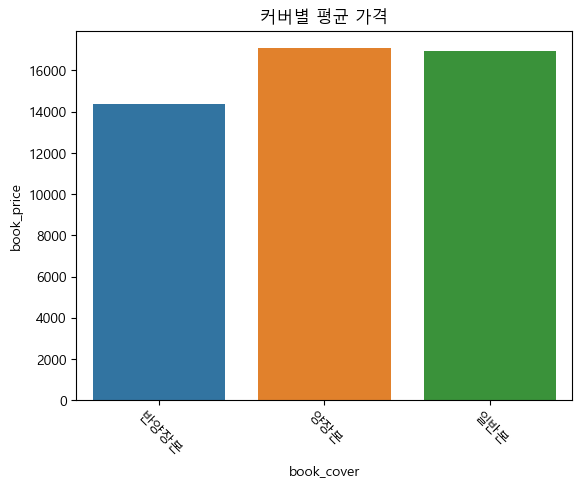

In [38]:
plt.xticks(rotation = -45)
plt.title('커버별 평균 가격')
sns.barplot(x='book_cover',y='book_price',data=cover_price)
plt.show()

In [39]:
cover_sales=pd.DataFrame(book.groupby('book_cover')['sales_point'].mean())  
cover_sales.reset_index(inplace=True)
cover_sales

,book_cover,sales_point
0,반양장본,4073.983819
1,양장본,4171.825503
2,일반본,1372.984227


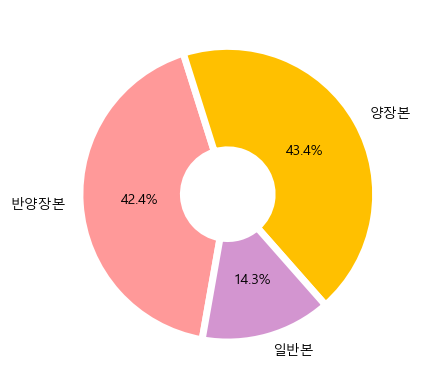

In [40]:
ratio = cover_sales['sales_point'] 
labels = cover_sales['book_cover']
colors = ['#ff9999', '#ffc000',  '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

In [41]:
book_writer=book.sort_values(by='sales_point',ascending=False)

In [42]:
sort_by_sale=book.sort_values(by='sales_point',ascending=False)

In [43]:
sort_by_sale.head()

,book_name,book_writer,book_date,book_price,book_cover,book_page,book_size,book_weight,book_category,book_publisher,sales_point
1823,역사의 역사,유시민,6,14400.0,반양장본,340,152*223mm,583,역사,돌베개,408240.0
505,나미야 잡화점의 기적 (100만 부 기념 특별 한정판),히가시노 게이고,7,13320.0,양장본,456,127*188mm,569,소설/시/희곡,현대문학,375092.0
1540,죽고 싶지만 떡볶이는 먹고 싶어,백세희,6,12420.0,반양장본,208,130*188mm,292,에세이,흔,188670.0
1664,열두 발자국,정재승,7,15120.0,반양장본,400,145*217mm,555,인문학,어크로스,154520.0
1360,인생좌표,이케다 다이사쿠,6,9000.0,양장본,240,128*188mm,401,자기계발,중앙books(중앙북스),152865.0


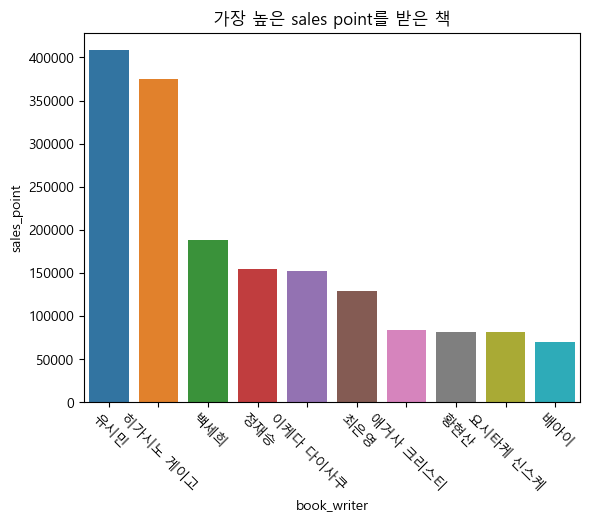

In [44]:
plt.xticks(rotation = -45)   
plt.title('가장 높은 sales point를 받은 책')
sns.barplot(x='book_writer',y='sales_point',data=sort_by_sale.head(10))
plt.show()

In [45]:
month_avg_point=pd.DataFrame(book.groupby('book_date')['sales_point'].sum())
month_avg_point.reset_index(inplace=True)
month_avg_point

,book_date,sales_point
0,3,42557.0
1,4,1015.0
2,5,60964.0
3,6,3061095.0
4,7,2987059.0
5,8,1154156.0
6,9,28640.0


<AxesSubplot:xlabel='book_date', ylabel='sales_point'>

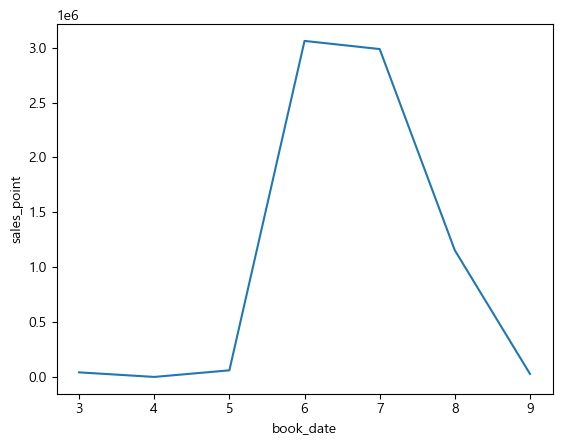

In [46]:
sns.lineplot(x='book_date',y='sales_point',data=month_avg_point) 

In [47]:
jun_book=sort_by_sale[sort_by_sale['book_date']==6] 
jun_book.head()

,book_name,book_writer,book_date,book_price,book_cover,book_page,book_size,book_weight,book_category,book_publisher,sales_point
1823,역사의 역사,유시민,6,14400.0,반양장본,340,152*223mm,583,역사,돌베개,408240.0
1540,죽고 싶지만 떡볶이는 먹고 싶어,백세희,6,12420.0,반양장본,208,130*188mm,292,에세이,흔,188670.0
1360,인생좌표,이케다 다이사쿠,6,9000.0,양장본,240,128*188mm,401,자기계발,중앙books(중앙북스),152865.0
1571,내게 무해한 사람,최은영,6,12150.0,반양장본,328,145*210mm,458,소설/시/희곡,문학동네,129290.0
1364,황현산의 사소한 부탁,황현산,6,12600.0,반양장본,344,152*223mm,491,에세이,난다,82095.0


In [48]:
july_book=sort_by_sale[sort_by_sale['book_date']==7] 
july_book.head()

,book_name,book_writer,book_date,book_price,book_cover,book_page,book_size,book_weight,book_category,book_publisher,sales_point
505,나미야 잡화점의 기적 (100만 부 기념 특별 한정판),히가시노 게이고,7,13320.0,양장본,456,127*188mm,569,소설/시/희곡,현대문학,375092.0
1664,열두 발자국,정재승,7,15120.0,반양장본,400,145*217mm,555,인문학,어크로스,154520.0
1010,그리고 아무도 없었다 (리커버 특별판. 페이퍼백),애거사 크리스티,7,9000.0,반양장본,352,113*183mm,281,소설/시/희곡,황금가지,83380.0
848,있으려나 서점,요시타케 신스케,7,11520.0,양장본,104,148*202mm,318,에세이,온다,81275.0
1886,설민석의 한국사 대모험 7,"설민석,?스토리박스",7,9450.0,반양장본,204,188*257mm,572,어린이,아이휴먼,66900.0


---

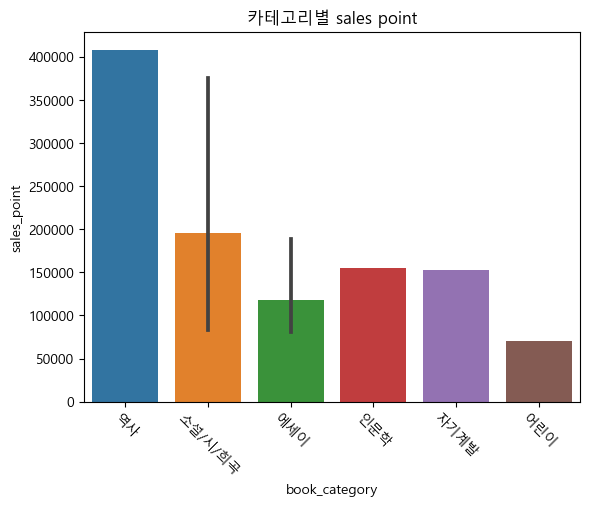

In [49]:
plt.xticks(rotation = -45)
plt.title('카테고리별 sales point')
sns.barplot(x='book_category',y='sales_point',data=sort_by_sale.head(10))
plt.show()

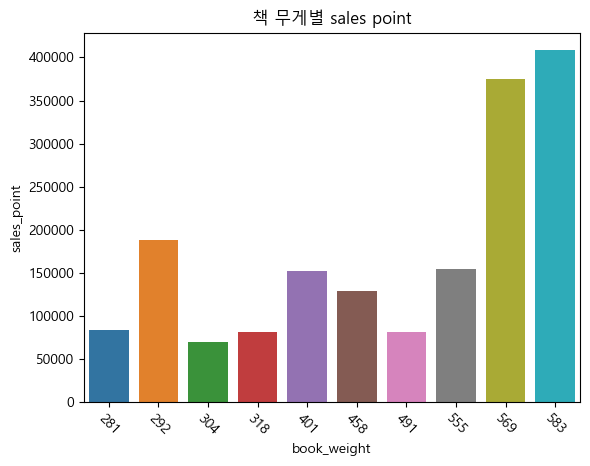

In [50]:
plt.xticks(rotation = -45)  
plt.title('책 무게별 sales point')
sns.barplot(x='book_weight',y='sales_point',data=sort_by_sale.head(10))
plt.show()

<AxesSubplot:xlabel='book_price', ylabel='sales_point'>

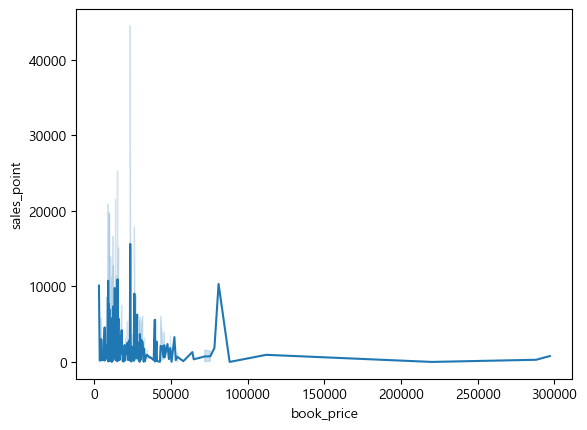

In [52]:
sns.lineplot(x='book_price',y='sales_point',data=book) 

In [53]:
book[(book['book_price']>75000)&(book['book_price']<90000)&(book['sales_point']<110000)&(book['sales_point']>8000)]

,book_name,book_writer,book_date,book_price,book_cover,book_page,book_size,book_weight,book_category,book_publisher,sales_point
984,국수 1~6 세트 - 전6권,김성동,8,81000.0,반양장본,2328,148*210mm,3026,소설/시/희곡,솔출판사,10330.0


In [54]:
book[(book['book_name']=='역사의 역사')]

,book_name,book_writer,book_date,book_price,book_cover,book_page,book_size,book_weight,book_category,book_publisher,sales_point
1823,역사의 역사,유시민,6,14400.0,반양장본,340,152*223mm,583,역사,돌베개,408240.0


<AxesSubplot:xlabel='book_page', ylabel='book_price'>

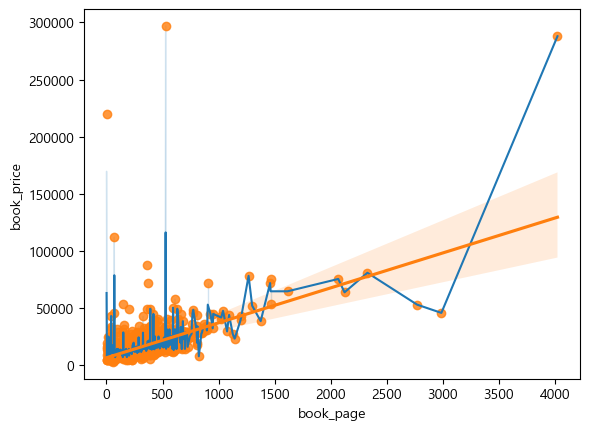

In [51]:
sns.lineplot(x='book_page',y='book_price',data=book)
sns.regplot(x='book_page',y='book_price',data=book)

### Step2에서 획득한 정보를 기술하세요.

* 제작 원가를 고려하지 않는다면 합리적인 커버 형태는 양장본이다.       
* 가장 인기있는 작가는 유시민,히가시노 게이코 순서로 보인다.
* 신간 출판 시기는 6,7월이 가장 유리하다.
* 가장 세일즈 포인트가 높은 카테고리는 역사분야이다.
* 신간 제작시 가장 합리적인 책 무게는 569~583(g)이다.
* 책가격은 30,000원 이하가 세일즈 포인트가 높은 가장 적당한 판매가로 판단된다.
  984번 인덱스의 경우 특수하게 81000의 가격에 세일즈 포인트가 높지만 이상치로 판단한다.

---

### Step1과 Step2를 반복하며 내용을 정리하세요.

### Step1의 내용  
데이터 분석의 목적, 대상 또는 가설을 세운다.
* 데이터 분석의 목적 : 의뢰인인 출판사의 신간의 저자, 출시월, 가격, 커버형태, 페이지수, 카테고리등을 추천하여
  높은 세일즈 포인트를 받을 가능성을 높인다.
* book cover가 양장본일수록 price가 높을 것이다. 
  또한 book cover와 sales point와의 관계를 알아보고자 한다.
* 높은 sales point 를 받은 책은 무엇인가? 가능하다면 인기작가 섭외를 추천한다. 
* 출시한 월에따라 sales point가 다를 것이다. 9,10,11월인 가을이 높을 것이다.
* 카테고리별 sales point를 비교해보고자 한다. 
* 페이지수가 증가할 수록 책의 무게와 책의 가격이 높아질 것이다.

---

## 2차 탐색적 데이터 분석

* book cover가 양장본일 수록 price가 높은 것은 맞지만 일반본과의 차이점은 크지 않았다. # 문구 수정  
  반양장본 데이터만이 의미있게 적은 price 평균값이 나왔다.  
  다만 book cover와 sales point와의 관계는 일반본만이 눈에띄게 적었다.
* 높은 sales point 를 받은 책을 정렬하여 인기있는 책의 순서를 정렬했으며  
  같은 데이터프레임에 작가를 확인할 수 있도록 구성하였다.
* 출시 월은 가설과 다르게 6,7월이 가장 판매횟수가 높았다.
* 역사 카테고리가 여타의 카테고리에 비하여 비약적인 세일즈 포인트를 보였다.
* 페이지수와 책의 가격간의 관계는 어느정도 정비례 관계로 보인다.

## 3차 탐색적 데이터 분석

In [55]:
cover_price_sales = pd.merge(left = cover_price, right = cover_sales) 
cover_price_sales

,book_cover,book_price,sales_point
0,반양장본,14366.933657,4073.983819
1,양장본,17074.429530,4171.825503
2,일반본,16931.198738,1372.984227


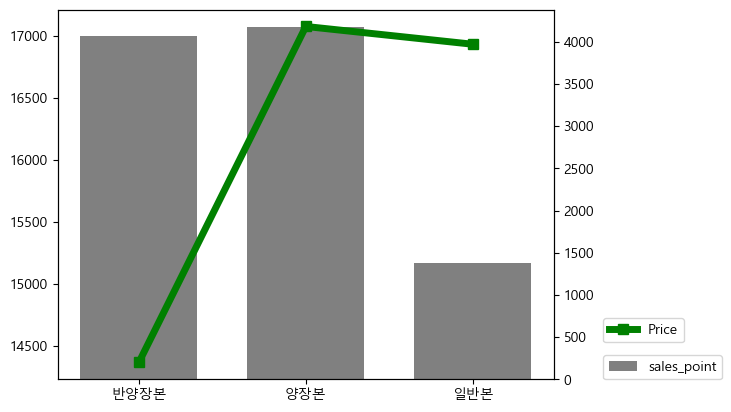

In [56]:
fig, ax1 = plt.subplots()  
ax1.plot(cover_price_sales['book_cover'], cover_price_sales['book_price'], '-s', color='green', markersize=7, linewidth=5, label='Price')
ax2 = ax1.twinx()
ax2.bar(cover_price_sales['book_cover'], cover_price_sales['sales_point'], color='gray', label='sales_point', width=0.7)
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)
ax1.legend(loc=(1.1,0.1))
ax2.legend(loc=(1.1,0))

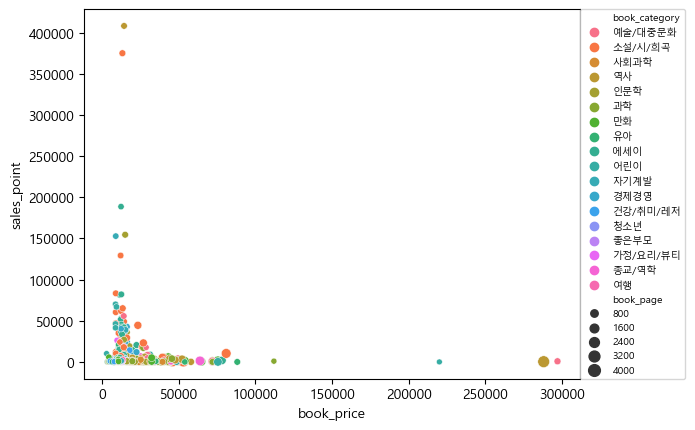

In [57]:
sns.scatterplot(data=book,x='book_price',y='sales_point',hue='book_category', size = 'book_page')
plt.legend(loc=(1,0), fontsize = 7.3)

---

## 최종결론 (차후 출시할 신간의 각 속성 추천) 

* 1차 추천 작가는 유시민, 히가시노 게이코이며 2차 추천 작가는 백세희, 정제승, 이케다 다이사쿠, 최은영입니다.
* 가능하다면 신간은 역사물 장르를 추천합니다. 여타의 장르와 비교하여 높은 인기가 있었습니다.
* 북 커버는 양장본을 추천합니다. 작가와 협의가 필요하시겠지만 페이지수를 늘려 책 무게는 569~583(g)으로 무거운 편이 유리합니다. 
* 출간 시기는 5,6월정도로 세일즈 포인트가 유달리 증가하는 6,7월의 흐름에 탈 것으로 예측됩니다.
* 책의 가격과 관련하여 여러가지 고려할 점이 있으시겠지만 30,000원 이하일 경우가 가장 안정적일 것으로 예상됩니다.